## Tool Calling with Agentic AI - AutoGen

### LLM Used - Granite3.0-8B

In this notebook we will learn how to use Tool Calling with Agentic AI in order to solve different problems.

Tool-calling agents expand the capabilities of an LLM by allowing it to interact with external systems. This approach empowers agents to dynamically solve problems by utilizing tools, accessing memory, and planning multi-step actions.

Tool calling agents enable:

1. Multi-Step Decision Making: The LLM can orchestrate a sequence of decisions to achieve complex objectives.
2. Tool Access: The LLM can select and use various tools as needed to interact with external systems and APIs.

This architecture allows for more dynamic and flexible behaviors, enabling agents to solve complex tasks by leveraging external resources efficiently.

In [1]:
!pip install autogen-agentchat~=0.2 autogen psutil --quiet
# !pip install -q langchain-openai termcolor langchain_community duckduckgo_search wikipedia openapi-python-client==0.12.3 langgraph langchain_experimental yfinance
!pip install -q langchain-openai termcolor langchain_community duckduckgo_search wikipedia openapi-python-client langgraph langchain_experimental openai --quiet


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import autogen
from typing import Literal

from pydantic import BaseModel, Field
from typing_extensions import Annotated

import autogen
from autogen.cache import Cache

# INFERENCE_SERVER_URL = os.getenv('API_URL_GRANITE')
# MODEL_NAME = "granite30-8b"
# API_KEY= os.getenv('API_KEY')

INFERENCE_SERVER_URL = "http://localhost:8000"
MODEL_NAME = "ibm-granite/granite-3.0-8b-instruct"
API_KEY= "alanliuxiang"


Patching name='PARAMS_MAPPING', member={'max_tokens': 'max_output_tokens', 'stop_sequences': 'stop_sequences', 'temperature': 'temperature', 'top_p': 'top_p', 'top_k': 'top_k', 'max_output_tokens': 'max_output_tokens'}, patched={'max_tokens': 'max_output_tokens', 'stop_sequences': 'stop_sequences', 'temperature': 'temperature', 'top_p': 'top_p', 'top_k': 'top_k', 'max_output_tokens': 'max_output_tokens'}
Patching name='__init__', member=<function GeminiClient.__init__ at 0x7f6ce8afe3e0>, patched=<function function.__call__ at 0x7f6ce8afed40>
Patching name='_concat_parts', member=<function GeminiClient._concat_parts at 0x7f6ce8afe7a0>, patched=<function function.__call__ at 0x7f6ce8afede0>
Patching name='_convert_json_response', member=<function GeminiClient._convert_json_response at 0x7f6ce8afe8e0>, patched=<function function.__call__ at 0x7f6ce8afee80>
Patching name='_create_gemini_function_declaration', member=<function GeminiClient._create_gemini_function_declaration at 0x7f6ce8afea

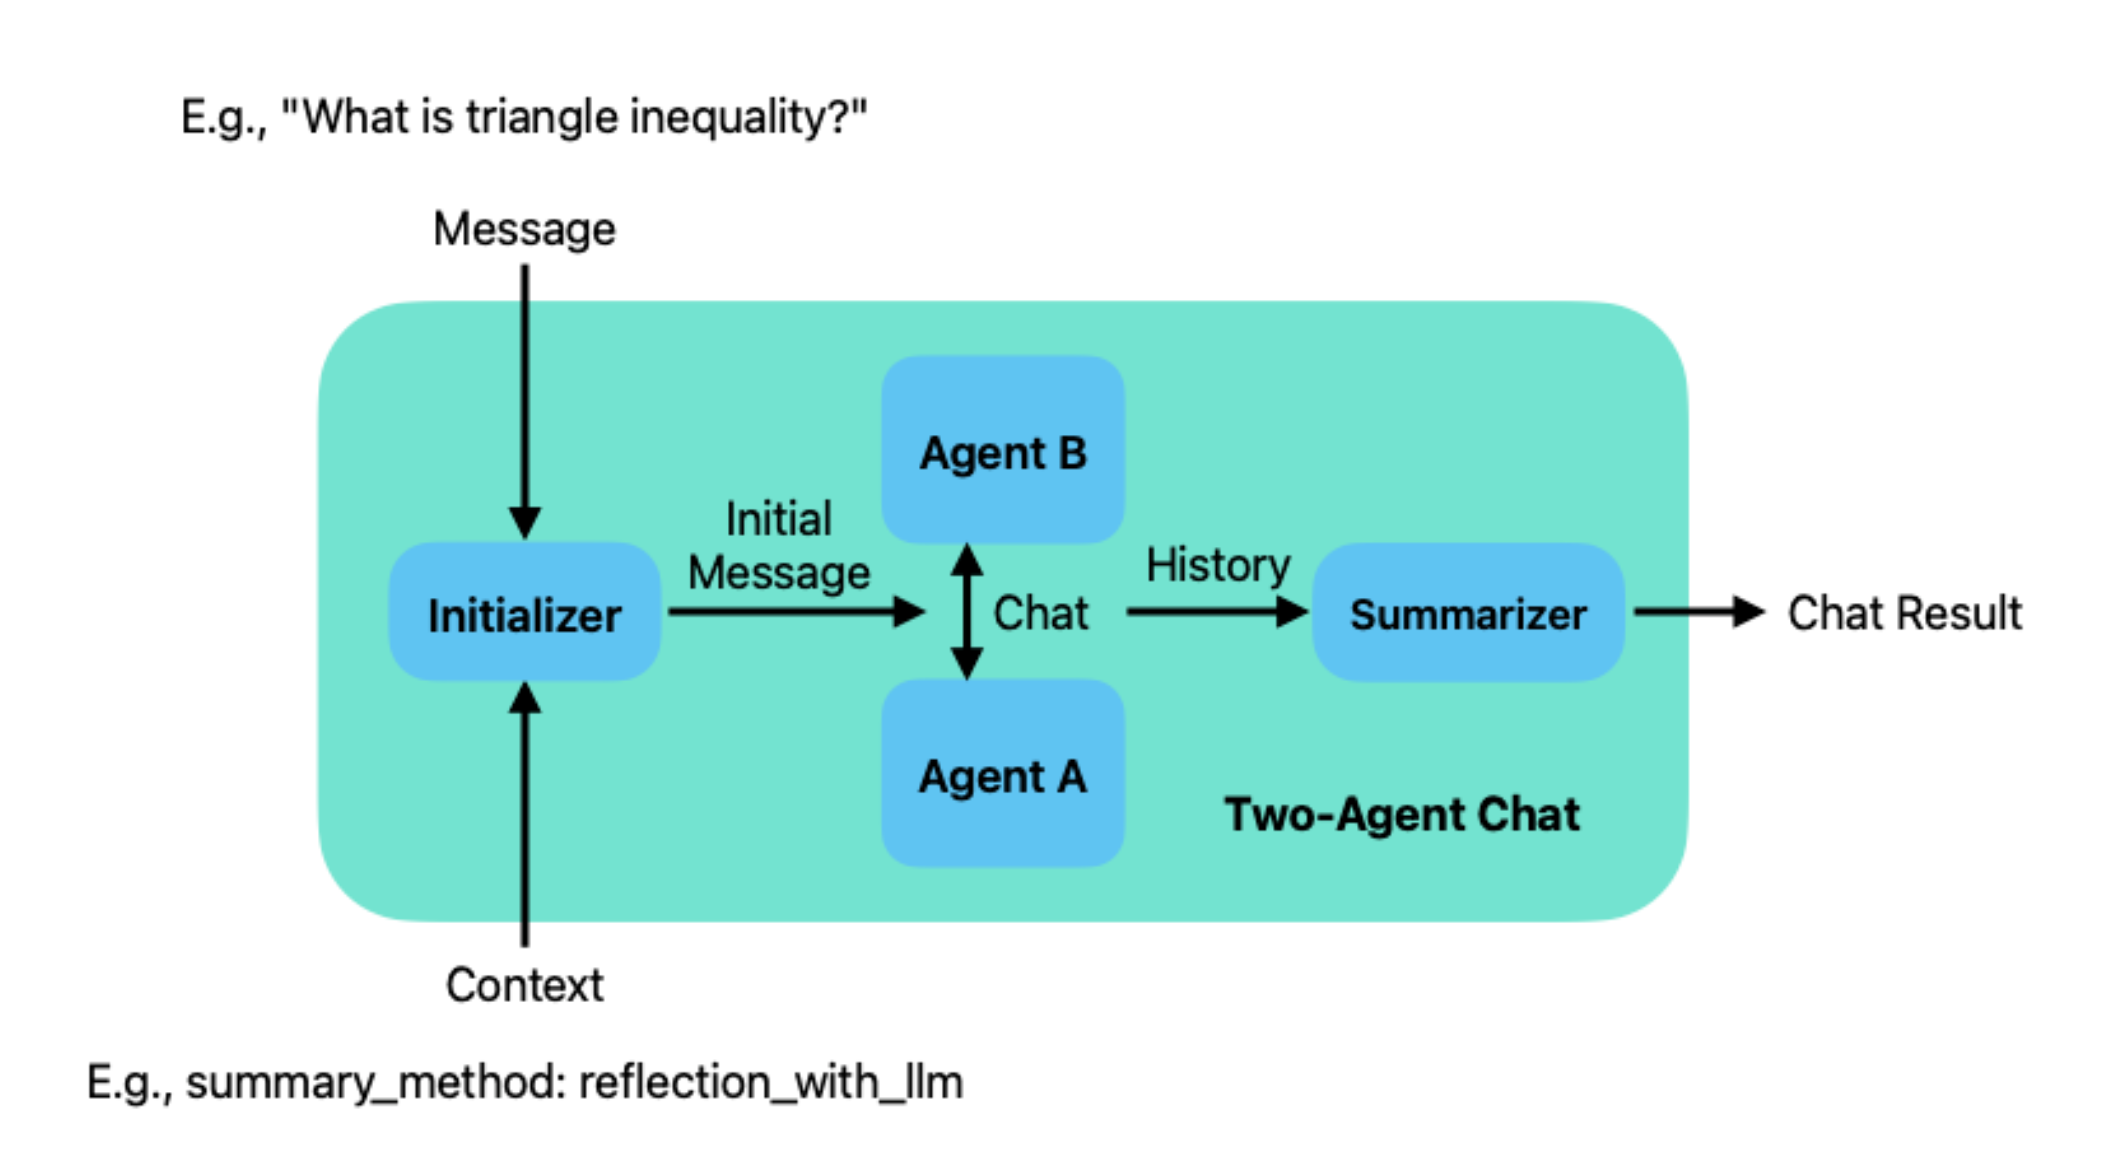


In [3]:
# Configuration for the vLLM endpoint
local_llm_config = {
    "config_list": [
        {
            "model": MODEL_NAME,
            "api_key": API_KEY,
            "base_url": f"{INFERENCE_SERVER_URL}/v1"
        }
    ],
    "cache_seed": None,
    "temperature": 0.01,
    "timeout": 600,
}

In [4]:
import os

from autogen import ConversableAgent

student_agent = ConversableAgent(
    name="Student_Agent",
    system_message="You are a student willing to learn.",
    llm_config=local_llm_config,
)
teacher_agent = ConversableAgent(
    name="Teacher_Agent",
    system_message="You are a math teacher.",
    llm_config=local_llm_config,
)

chat_result = student_agent.initiate_chat(
    teacher_agent,
    message="What is triangle inequality?",
    summary_method="reflection_with_llm",
    max_turns=2,
)

Student_Agent (to Teacher_Agent):

What is triangle inequality?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 01-29 08:24:24] {521} WARNING - Model ibm-granite/granite-3.0-8b-instruct is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
Teacher_Agent (to Student_Agent):

The triangle inequality is a fundamental concept in geometry and mathematics. It states that the sum of the lengths of any two sides of a triangle must be greater than the length of the remaining side. Mathematically, for a triangle with sides a, b, and c, the triangle inequality is expressed as:

a + b > c
a + c > b
b + c > a

This principle is essential in understanding the properties of triangles and has applications in various fields, including physics, engineering, and computer science.

------------------------------------------